In [1]:
import numpy as np 
import pandas as pd

In [ ]:
# get the new train 

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

In [ ]:
sql = """
SELECT
    *
FROM
    `ds5500.kkbox.members_exist_before_2016`
"""
new_member = client.query(sql).to_dataframe()

In [ ]:
len(new_member)

In [2]:
member = pd.read_csv('../../kkbox-churn-prediction-challenge/member_before_2016.csv')

In [13]:
train = pd.read_csv('../../kkbox-churn-prediction-challenge/train_v2_final_201702.csv')

In [4]:
train.head(1)

,msno,is_churn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0


In [ ]:
len(train)

In [10]:
new_train = train.merge(member,"inner",on="msno")

In [17]:
new_train.is_churn = np.where(new_train.is_churn == 0, 'Retained',"Churned")

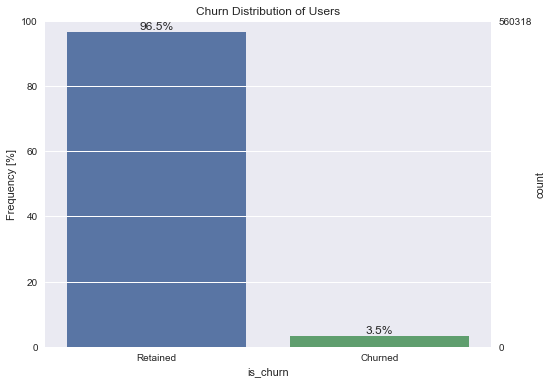

In [22]:
# new train churn vs. un-churned
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# The count of churn and not churn
ax=sns.countplot(x="is_churn", data=new_train)
plt.title('Churn Distribution of Users')
ncount = len(new_train)
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')
ax2.set_xlabel('Retained Churned')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(2))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
sns.set(rc={'figure.figsize':(6,8)})

plt.show()

In [ ]:
# get Jan 2017 log data
sql = """
SELECT
    *
FROM
    `ds5500.kkbox.user_logs_for_members_existed_before_2016`
WHERE date<='2017-01-31' and date>='2017-01-01'
"""
user_log_jan = client.query(sql).to_dataframe()

In [ ]:
len(user_log_jan)

In [ ]:
# export all the datasets

In [ ]:
user_log_jan.to_csv('../kkbox-churn-prediction-challenge/user_log_jan_before_2016.csv', index=False)

In [ ]:
new_train.to_csv('../kkbox-churn-prediction-challenge/train_before_2016.csv', index=False)

In [ ]:
new_member.to_csv('../kkbox-churn-prediction-challenge/member_before_2016.csv', index=False)

In [ ]:
# new EDA for new train 

In [2]:
train=pd.read_csv('../kkbox-churn-prediction-challenge/train_before_2016.csv')

In [6]:
len(train)

560318

In [7]:
user_log = pd.read_csv('../kkbox-churn-prediction-challenge/user_log_jan_before_2016.csv')

In [10]:
len(user_log)

12257559

In [11]:
user = user_log.merge(train,on='msno', how='inner')

In [13]:
df_stat=user.groupby(['msno','is_churn']).agg(
    {'date':['count'],'num_25':['mean'],'num_50':['mean'],'num_75':['mean'],'num_985':['mean'],
     'num_100':['mean'],'num_unq':['mean'],'total_secs':['mean']})

In [14]:
df_stat.columns = df_stat.columns.droplevel(1)

/Users/wangzhengye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


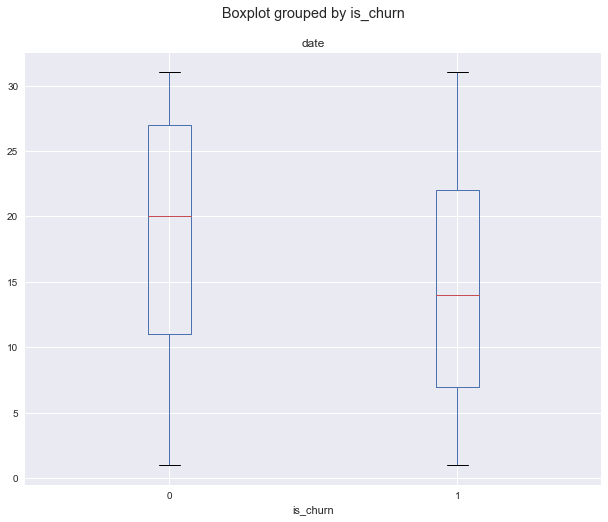

In [24]:
df_stat.boxplot(column='date',by='is_churn',figsize=(10,8))
plt.show()